Claim: "Furthermore, signatures derived from hematopoietic cells are elevated in tissue samples from patients with Stevens Johnsons disease, which are collected from blister fluid, along with mucosis fungoides, a T cell neoplasm, and sarcoidosis, which also typically has abundant granulomas."

Stat to Bootstrap around:  Ratio of hematopoietic sig score in SJ disease/ average of same score across all other skin diseases

# The hematopoietic signature score for SJ disease is significantly different from that of all other skin diseases

## Figure Making

In [1]:
import pickle
import pandas as pd

#Read in the data
df = pd.read_pickle("C:/Users/Melton/OneDrive/Documents/School/CASB185Proj/unnormalized_skin_diseases.txt.pkl")

In [2]:
#Make sure pandas dataframe works
df['Stevens Johnson syndrome']

GTEx skin - not sun exposed (suprapubic)    94.9336785714
GTEx skin - sun exposed (lower leg)         67.2396896552
WRS_Macrophage                              385.427340426
HBA_Pancreas                                46.0425918367
HBA_PancreaticIslet                         61.0551020408
                                                ...      
HPCA_Bronchial_Epithelial_cells                  64.72202
DermDB_Squamous cell carcinoma                   756.1288
HBA_Tonsil                                     538.833625
HBA_Tongue                                      233.49004
HBA_BronchialEpithelialCells                345.218693878
Name: Stevens Johnson syndrome, Length: 354, dtype: object

In [3]:
#Making a function to do all of the below:
#For HBA_, DermDB_, and GTEx
def plot_and_pull_for(header):
    hema_list = []
    for ind in df.index:
        if(header in ind):
            hema_list.append(ind)
    hema_sig_score_all = []
    for type_of_cell in df.index:
        wrs_cell=0
        if(header in type_of_cell):
            for val in df.loc[type_of_cell]:
                wrs_cell+=float(val)
            hema_sig_score_all.append(wrs_cell/24)
    hema_sig_score_sj = [df.loc[item]['Stevens Johnson syndrome'] for item in hema_list]
    import matplotlib.pyplot as plt
    y = list(map(float, hema_sig_score_sj))
    fig, ax = plt.subplots(figsize=(4, len(hema_list)/3))
    a = ax.plot(hema_sig_score_all, hema_list)
    a[0].set_label('All Skin Diseases')
    ax.set(xlabel='Signature Score', ylabel='Cell Type',
           title='All Skin Diseases vs Steven Johnson Syndrome for %s'%header)
    b = ax.plot(y, hema_list)
    b[0].set_label('Stevens Johnson')
    ax.legend()
    [float(i) for i in hema_sig_score_all]
    return y, hema_sig_score_all

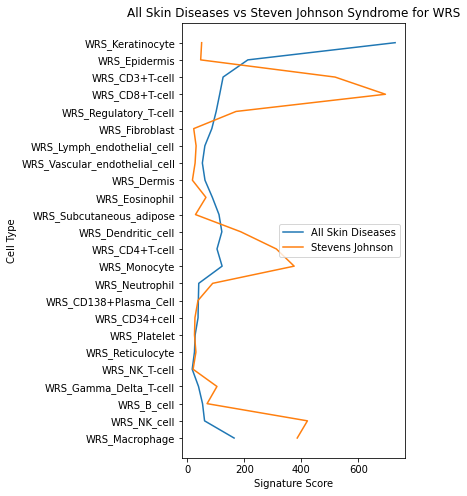

In [20]:
wrs_sj, wrs_all = plot_and_pull_for('WRS')

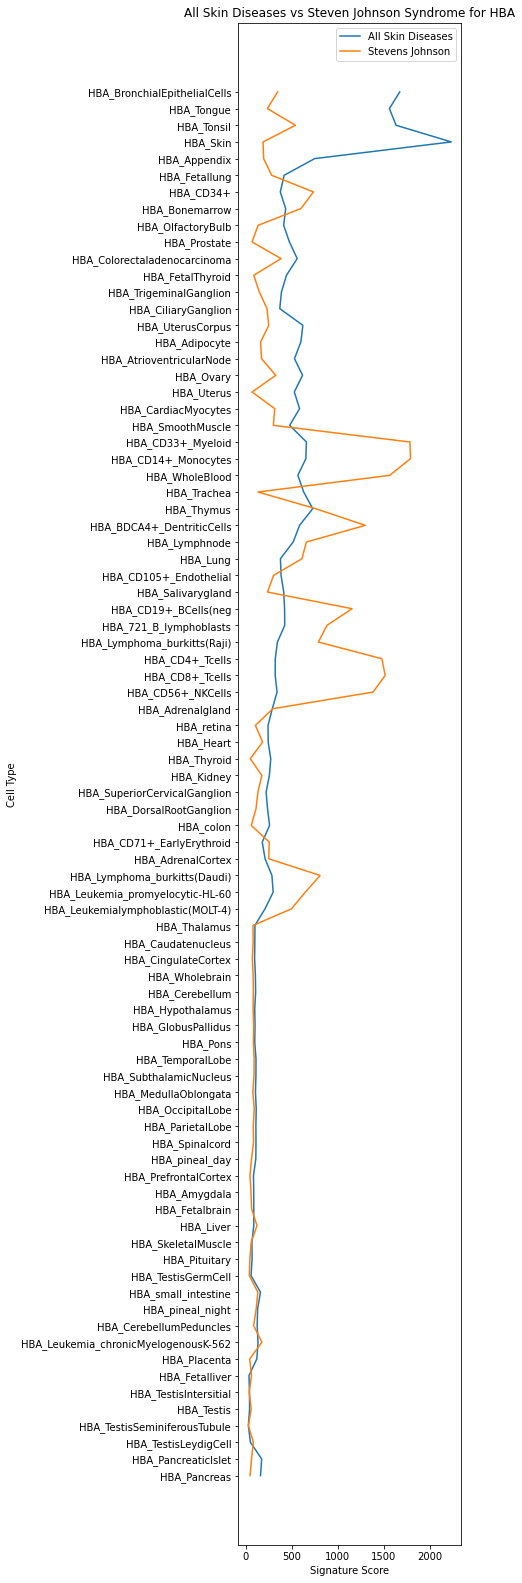

In [4]:
hba_sj, hba_all = plot_and_pull_for('HBA')

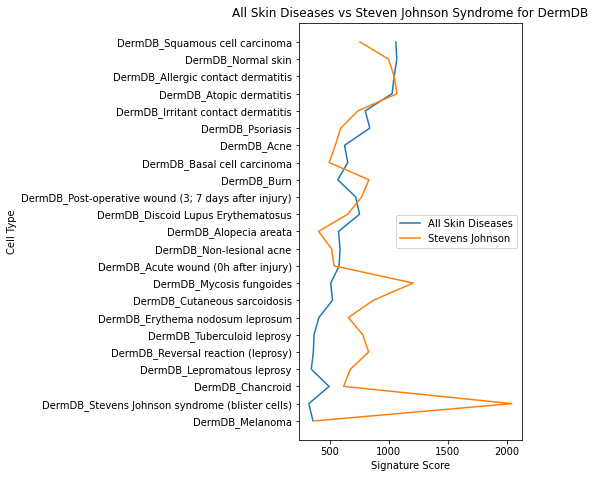

In [5]:
dermdb_sj, dermdb_all = plot_and_pull_for('DermDB')

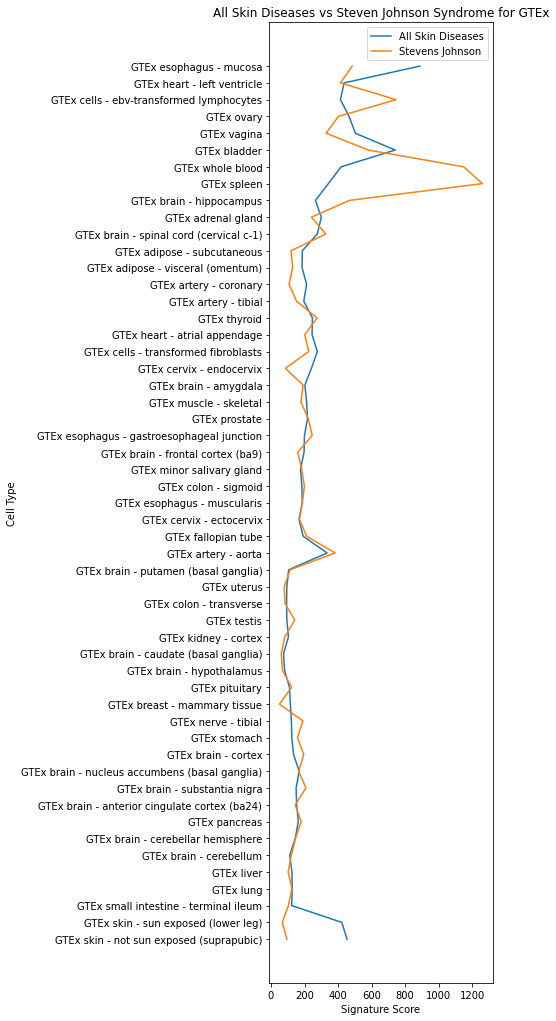

In [6]:
gtex_sj, gtex_all = plot_and_pull_for('GTEx')

In [7]:
#Here is the list of hematopoietic signature scores' names
hema_list = []
for ind in df.index:
    if('WRS' in ind):
        hema_list.append(ind)

In [8]:
#Here are their scores
hema_sig_score_all = []
for type_of_cell in df.index:
    wrs_cell=0
    if('WRS' in type_of_cell):
        for val in df.loc[type_of_cell]:
            wrs_cell+=float(val)
        hema_sig_score_all.append(wrs_cell/24)

In [9]:
#We want the hematopoetic signature scores from only Stevens Johnson disease now
hema_sig_score_sj = [df.loc[item]['Stevens Johnson syndrome'] for item in hema_list]

### We answer the question: what does the data for each(stevens johnson vs all skin disease) look like?

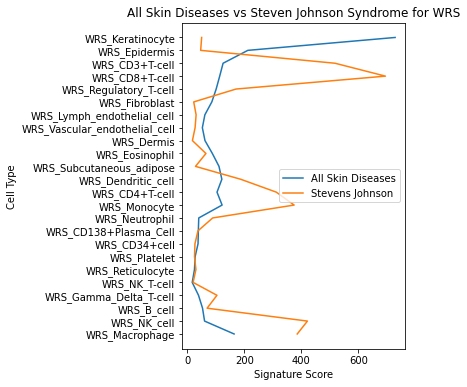

In [10]:
#Same graph as earlier, but overlaid on top of each other
import matplotlib.pyplot as plt
y = list(map(float, hema_sig_score_sj))
fig, ax = plt.subplots(figsize=(4, 6))
a = ax.plot(hema_sig_score_all, hema_list)
a[0].set_label('All Skin Diseases')
ax.set(xlabel='Signature Score', ylabel='Cell Type',
       title='All Skin Diseases vs Steven Johnson Syndrome for WRS')
b = ax.plot(y, hema_list)
b[0].set_label('Stevens Johnson')
ax.legend()

# Statistical Testing

### Kolmogorov–Smirnov test

In [11]:
#We can compare the distribution between y and hema_sig_score_all
from scipy.stats import ks_2samp

ks_2samp(y, hema_sig_score_all)

KstestResult(statistic=0.2916666666666667, pvalue=0.26283384201555077)

#### The KS test suggests no significant difference (p=0.263 > 0.05)

### Mann Whitneyu test

In [12]:
from scipy.stats import mannwhitneyu

mannwhitneyu(y, hema_sig_score_all)

MannwhitneyuResult(statistic=270.0, pvalue=0.359108064766993)

#### The Mann Whitneyu test suggests no significant difference (p=0.359 > 0.05)

# Bootstrapping

In [24]:
def get_bootstrap(name, sj_data, all_data):
    import numpy as np

    experimental_diff = np.mean(sj_data) - np.mean(all_data)
    
    from sklearn.utils import resample

    iterations = 10000
    bootstrapped_differences = []

    for i in range(iterations):
        sj_bootstrapped = resample(sj_data+hema_sig_score_all, replace=True, n_samples=25)
        all_bootstrapped = resample(sj_data+hema_sig_score_all, replace=True, n_samples=25)
        bootstrapped_differences.append(np.mean(sj_bootstrapped)-np.mean(all_bootstrapped))
        
    countResultsAsOrMoreExtreme = 0
    for i in range(iterations):
        if (bootstrapped_differences[i] >= experimental_diff or
           bootstrapped_differences[i] <= -1*experimental_diff):
            countResultsAsOrMoreExtreme += 1
    p_value = countResultsAsOrMoreExtreme/iterations
    
    import seaborn as sns

    ax = sns.histplot(bootstrapped_differences)
    ax.set_title(name)
    ax.set(xlabel= 'Difference between Sig Scores', ylabel= 'Count')
    ax.axvline(experimental_diff, color = "red")
    ax.axvline(-1*experimental_diff, color = "red")
    return p_value

In [14]:
import numpy as np

experimental_diff = np.mean(y) - np.mean(hema_sig_score_all)

In [15]:
print("The difference between SJ's scores and all skin diseases' scores is %s " % experimental_diff)

The difference between SJ's scores and all skin diseases' scores is 48.43084003326945 


In [16]:
from sklearn.utils import resample

iterations = 10000
bootstrapped_differences = []

for i in range(iterations):
    sj_bootstrapped = resample(y+hema_sig_score_all, replace=True, n_samples=25)
    all_bootstrapped = resample(y+hema_sig_score_all, replace=True, n_samples=25)
    bootstrapped_differences.append(np.mean(sj_bootstrapped)-np.mean(all_bootstrapped))
    

In [17]:
countResultsAsOrMoreExtreme = 0
for i in range(iterations):
    if (bootstrapped_differences[i] > experimental_diff):
        countResultsAsOrMoreExtreme += 1
p_value = countResultsAsOrMoreExtreme/iterations

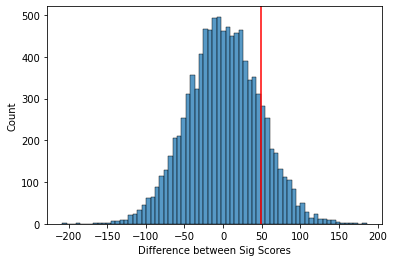

In [18]:
import seaborn as sns

ax = sns.histplot(bootstrapped_differences)
ax.set(xlabel= 'Difference between Sig Scores', ylabel= 'Count')
ax.axvline(experimental_diff, color = "red")

0.2928


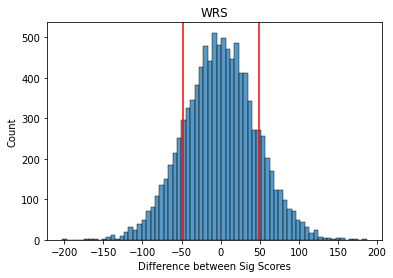

In [25]:
print(get_bootstrap('WRS',wrs_sj, wrs_all))

1.0


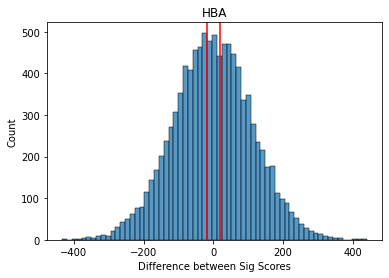

In [32]:
print(get_bootstrap('HBA',hba_sj, hba_all))

0.2143


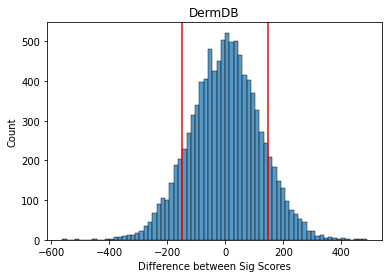

In [30]:
print(get_bootstrap("DermDB",dermdb_sj, dermdb_all))

0.9172


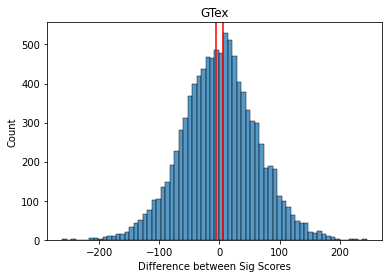

In [31]:
print(get_bootstrap('GTex',gtex_sj, gtex_all))